In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import gradio as gr

In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(len(X_train))

60000


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
len(X_test)
X_train[0].shape #pixel size
X_train[0] #2D array of pixel values (grayscale image)

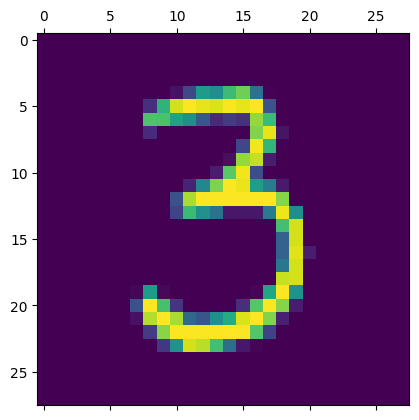

In [ ]:
  plt.matshow(X_train[50])

In [ ]:
y_train[50]
X_train.shape

(60000, 28, 28)

In [ ]:
#flatten trtaining dataset

X_train_flattened  =   X_train.reshape(len(X_train),28*28)
X_train_flattened.shape #(60000, 784)


(60000, 784)

In [ ]:
X_test_flat = X_test.reshape(len(X_test), 28*28)
X_test_flat.shape


(10000, 784)

In [ ]:
#Simple Neural Network with no Hidden Layer
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,),activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']


)
model.fit(X_train_flattened,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4662 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9257


In [ ]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2698 - accuracy: 0.9226


[0.26979196071624756, 0.9225999712944031]

In [ ]:
y_predict = model.predict(X_test_flat)
X_test_flat.shape

313/313 [==============================] - 1s 2ms/step


(10000, 784)

array([9.9904102e-01, 8.7036277e-08, 6.6769280e-02, 3.7659764e-02,
       3.0766260e-03, 9.1194397e-01, 9.7265244e-03, 2.9075818e-04,
       8.3855510e-01, 6.3440464e-02], dtype=float32)

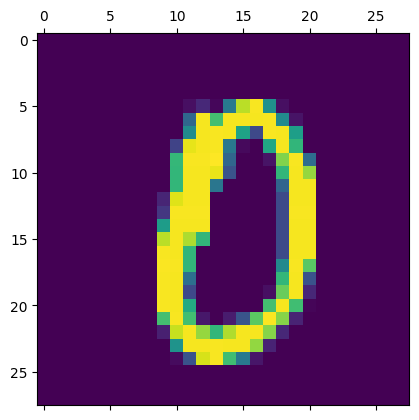

In [ ]:
plt.matshow(X_test[55])
y_predict[55] # scores for all digits from zero to 9

In [ ]:
np.argmax(y_predict[55]) #index of the max score value

0

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5] 

[7, 2, 1, 0, 4]

In [ ]:
#Confusion Matrix 
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    1,    0,    4,    4,    3,    2,    0],
       [   0, 1106,    3,    2,    1,    1,    4,    2,   16,    0],
       [   8,    9,  913,   14,   15,    5,   13,   13,   38,    4],
       [   4,    0,   17,  908,    2,   29,    1,   14,   28,    7],
       [   2,    1,    3,    1,  924,    0,    7,    4,   10,   30],
       [  11,    3,    2,   24,   12,  776,   15,    9,   34,    6],
       [  13,    3,    5,    1,    9,   13,  909,    2,    3,    0],
       [   1,    5,   21,    5,    9,    0,    0,  953,    4,   30],
       [   7,    7,    5,   13,    9,   19,    8,   13,  885,    8],
       [  11,    7,    1,    9,   36,    7,    0,   23,    5,  910]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

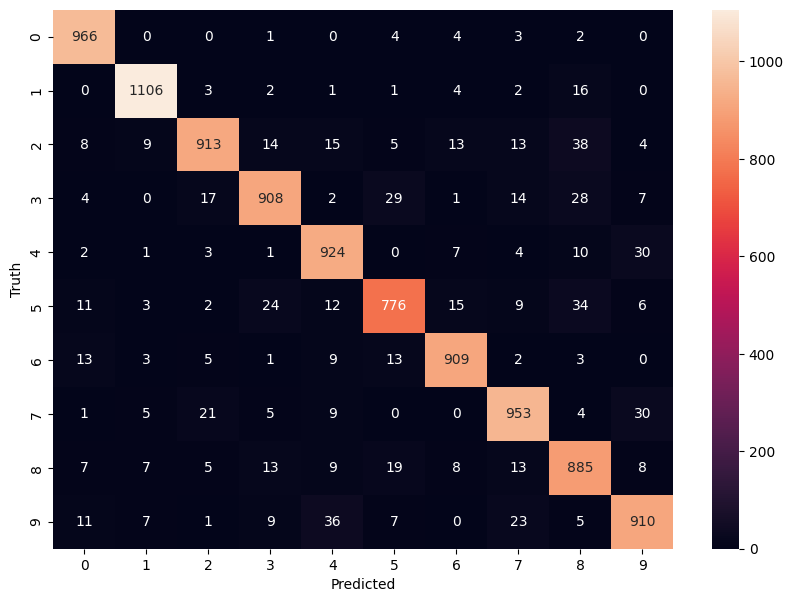

In [ ]:
import seaborn as sb
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot = True,fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(300, input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']


)
model.fit(X_train_flattened,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2193 - accuracy: 0.9355
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0878 - accuracy: 0.9732
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0570 - accuracy: 0.9823
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0414 - accuracy: 0.9870
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0304 - accuracy: 0.9905


In [ ]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0728 - accuracy: 0.9781


[0.0727553740143776, 0.9781000018119812]

Text(95.72222222222221, 0.5, 'Truth')

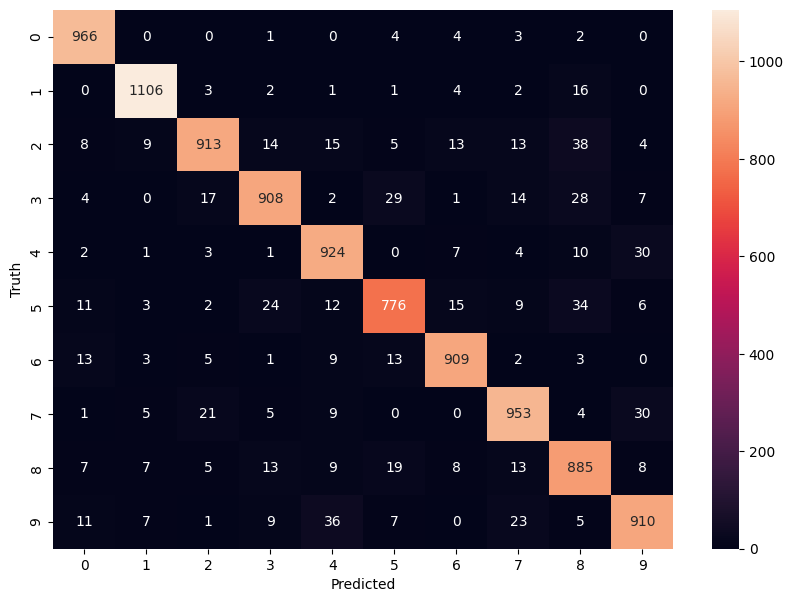

In [ ]:
import seaborn as sb
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot = True,fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')